## Imports ##

In [1]:
import numpy as np
import pandas as pd
import math
import sys
from numpy import random
from numpy import linalg
import matplotlib.pyplot as plt
import pickle

## Input ##

In [2]:
n_row = 2000
n_col = 1000
possibilities = [-1, 1]

In [3]:
W = np.random.normal(size = (n_row, n_col)) 
X = np.random.choice(possibilities, n_col)
Y = np.maximum((np.dot(W, X)/math.sqrt(n_col)), 0)
T = 0.1
B = 1/T
n_iter = 20
N = 100

## Helper functions ##

In [4]:
def energy(vector):
    _sum = 0
    dot = np.dot(W, vector)
    for i in range(len(Y)):
        _sum += (Y[i] - np.maximum(0, (dot[i])/math.sqrt(n_col)))**2
    return _sum

In [5]:
def error(vector):
    sum = 0
    for i in range(len(vector)):
        sum += (vector[i] - X[i])**2   
    return sum/(4*n_col)

def plot(errors, names=[]):
    
    for error in errors:
        x, y = zip(*error)    
        plt.plot(np.array(x), np.array(y), 'o-')
    
    plt.legend(names, loc='upper right')
    plt.ylabel('Error')
    plt.xlabel('Beta')

    plt.show()

In [11]:
def Metropolis_chain(dim, n_iter, params):
    test = np.random.choice(possibilities, dim)
    
    errors = []
    
    last_update = 0
    
    B, range_size, progress_threshold, b_offset = params
        
    for _iter in range(n_iter):
        new_error = error(test)
        errors.append((_iter, new_error))
        
        if _iter % 1000 == 0 :
            print("error {0} at {1}".format(new_error, _iter))
            
        if _iter > range_size and last_update < _iter - range_size/5:
            progress = errors[_iter-range_size][1] - errors[_iter][1]
            if progress < progress_threshold:
                last_update = _iter
                B = B + b_offset
    
        to_flip = np.random.randint(0, dim)
        to_test = test.copy()
        to_test[to_flip] = -to_test[to_flip]
        proba = np.minimum(1, np.exp(-B*(energy(to_test)-energy(test))))
        if random.random() < proba:
            test = to_test
    print("After {0} iterations, B is {1} and error is {2}".format(n_iter, B, errors[-1][1]))
    return errors

In [7]:
def Glauber(dim, n_iter, B, treshold, rate):
    test = np.random.choice(possibilities, dim)
    
    errors = []
    
    for _iter in range(n_iter):
        if _iter % 10 == 0 :
            new_error = error(test)
            errors.append((_iter, new_error))

        if _iter > n_iter*treshold:
            B = B*rate
        to_flip = np.random.randint(0, dim)
        flipped = test.copy()
        flipped[to_flip] = test[to_flip]*-1
        proba = (1 + test[to_flip]*math.tanh(B*(energy(flipped) - energy(test))))/2.0
        if random.random() < proba:
            test[to_flip] = 1 
        else:
            test[to_flip] = -1
    return errors

def save(liste, name="errors"):
    with open(name, 'wb') as fp:
        pickle.dump(liste, fp)

def read(name="errors"):
    with open (name, 'rb') as fp:
        return pickle.load(fp)

## Bon Bail

In [13]:
# le troisieme paramettre fait parfois de la shit?

params = [(3, 152, 0.003, 0.01), (3, 152, 0.003, 0.03), (3, 152, 0.014, 0.01)]
for param in params:
    Metropolis_chain(n_col, 10000, param)

error 0.509 at 0


KeyboardInterrupt: 

## Grid Seach

In [74]:
all_errors = []

for range_size in np.linspace(5, 300, 5):
    for progress_threshold in np.linspace(0.003, 0.014, 4):
        for offset_b in np.linspace(0.01, 0.03, 4):
            for beta in [0.5, 1, 2, 3]:
                range_size = int(range_size)
                errors, betas = Metropolis_chain(n_col, 5000, beta, range_size, progress_threshold, offset_b)
                params = beta, range_size, progress_threshold, offset_b
                all_errors.append((params, errors))
                
save(all_errors, "all_errors")

0.519 0
0.379 1000
0.295 2000
0.253 3000
0.226 4000
Final Beta is 25.100000000001124
0.518 0
0.39 1000
0.294 2000
0.237 3000
0.201 4000
Final Beta is 25.72000000000122
0.496 0
0.329 1000
0.253 2000
0.201 3000
0.156 4000
Final Beta is 26.520000000001346
0.509 0
0.389 1000
0.3 2000
0.26 3000
0.233 4000
Final Beta is 27.63000000000154
0.505 0
0.346 1000
0.268 2000
0.221 3000
0.189 4000
Final Beta is 41.39999999999893
0.501 0
0.357 1000
0.276 2000
0.23 3000
0.206 4000
Final Beta is 41.98333333333223
0.488 0
0.358 1000
0.287 2000
0.249 3000
0.222 4000
Final Beta is 43.31666666666549
0.519 0
0.378 1000
0.29 2000
0.214 3000
0.163 4000
Final Beta is 43.833333333332135
0.488 0
0.35 1000
0.258 2000
0.2 3000
0.16 4000
Final Beta is 57.830000000000226
0.478 0
0.324 1000
0.246 2000
0.204 3000
0.163 4000
Final Beta is 58.49333333333357
0.529 0
0.365 1000
0.297 2000
0.231 3000
0.206 4000
Final Beta is 59.33000000000023
0.536 0
0.379 1000
0.288 2000
0.238 3000
0.198 4000
Final Beta is 60.4933333333335

0.363 1000
0.289 2000
0.242 3000
0.204 4000
Final Beta is 4.759999999999941
0.501 0
0.352 1000
0.261 2000
0.21 3000
0.181 4000
Final Beta is 5.759999999999941
0.495 0
0.365 1000
0.267 2000
0.207 3000
0.161 4000
Final Beta is 5.13333333333332
0.472 0
0.359 1000
0.26 2000
0.201 3000
0.167 4000
Final Beta is 5.61666666666665
0.513 0
0.338 1000
0.266 2000
0.209 3000
0.147 4000
Final Beta is 6.533333333333317
0.51 0
0.349 1000
0.278 2000
0.211 3000
0.179 4000
Final Beta is 7.466666666666651
0.508 0
0.357 1000
0.267 2000
0.223 3000
0.186 4000
Final Beta is 6.706666666666689
0.493 0
0.36 1000
0.291 2000
0.237 3000
0.209 4000
Final Beta is 7.580000000000027
0.506 0
0.357 1000
0.276 2000
0.225 3000
0.191 4000
Final Beta is 8.416666666666693
0.506 0
0.359 1000
0.254 2000
0.209 3000
0.164 4000
Final Beta is 9.346666666666692
0.477 0
0.367 1000
0.271 2000
0.227 3000
0.186 4000
Final Beta is 8.780000000000005
0.503 0
0.379 1000
0.27 2000
0.204 3000
0.164 4000
Final Beta is 9.099999999999998
0.497 0

0.295 3000
0.267 4000
Final Beta is 1.0166666666666682
0.467 0
0.325 1000
0.277 2000
0.211 3000
0.188 4000
Final Beta is 1.4166666666666652
0.489 0
0.361 1000
0.254 2000
0.187 3000
0.152 4000
Final Beta is 2.299999999999999
0.491 0
0.371 1000
0.283 2000
0.234 3000
0.206 4000
Final Beta is 3.2333333333333325
0.512 0
0.373 1000
0.323 2000
0.276 3000
0.262 4000
Final Beta is 1.340000000000001
0.481 0
0.334 1000
0.27 2000
0.231 3000
0.192 4000
Final Beta is 1.5366666666666688
0.502 0
0.351 1000
0.257 2000
0.201 3000
0.176 4000
Final Beta is 2.3500000000000014
0.525 0
0.371 1000
0.283 2000
0.225 3000
0.189 4000
Final Beta is 3.2333333333333343
0.516 0
0.395 1000
0.337 2000
0.282 3000
0.246 4000
Final Beta is 1.1900000000000006
0.495 0
0.382 1000
0.282 2000
0.23 3000
0.198 4000
Final Beta is 1.6300000000000006
0.487 0
0.336 1000
0.249 2000
0.19 3000
0.161 4000
Final Beta is 2.629999999999996
0.493 0
0.346 1000
0.259 2000
0.19 3000
0.156 4000
Final Beta is 3.179999999999999
0.488 0
0.375 1000

Final Beta is 1.5833333333333313
0.514 0
0.341 1000
0.257 2000
0.215 3000
0.2 4000
Final Beta is 2.516666666666665
0.479 0
0.35 1000
0.274 2000
0.233 3000
0.191 4000
Final Beta is 3.3666666666666654
0.507 0
0.396 1000
0.32 2000
0.267 3000
0.233 4000
Final Beta is 1.3166666666666675
0.499 0
0.379 1000
0.291 2000
0.238 3000
0.23 4000
Final Beta is 1.81666666666667
0.504 0
0.357 1000
0.285 2000
0.228 3000
0.188 4000
Final Beta is 2.6766666666666694
0.486 0
0.346 1000
0.282 2000
0.238 3000
0.198 4000
Final Beta is 3.606666666666669
0.465 0
0.379 1000
0.32 2000
0.298 3000
0.258 4000
Final Beta is 1.550000000000001
0.498 0
0.361 1000
0.274 2000
0.228 3000
0.199 4000
Final Beta is 1.8700000000000008
0.486 0
0.332 1000
0.26 2000
0.194 3000
0.165 4000
Final Beta is 2.8699999999999943
0.503 0
0.34 1000
0.257 2000
0.179 3000
0.129 4000
Final Beta is 3.3599999999999977
0.479 0
0.385 1000
0.31 2000
0.266 3000
0.242 4000
Final Beta is 0.9600000000000004
0.492 0
0.393 1000
0.322 2000
0.25 3000
0.208 

In [133]:
filtered = [(params, errors[-1][1]) for (params, errors) in all_errors if errors[-1][1] < 0.1]
filtered

[((3, 152, 0.006666666666666666, 0.03), 0.08),
 ((3, 152, 0.014, 0.01), 0.085),
 ((3, 300, 0.010333333333333333, 0.03), 0.095)]

In [128]:
errors_round2 = []
for (params, _) in filtered:
    tmp_errors = []
    
    beta, range_size, progress_threshold, offset_b = params
    for i in range(5):
        errors, betas = Metropolis_chain(n_col, 10000, beta, range_size, progress_threshold, offset_b)
        new_error = errors[-1][1]
        tmp_errors.append(new_error)
    avg_err = sum(tmp_errors)/len(tmp_errors)
    errors_round2.append((params, avg_err))
    
save(errors_round2, "errors_round2")

After 10000 iterations, B is 85.48333333332977 and error is 0.057
After 10000 iterations, B is 85.73333333332975 and error is 0.013
After 10000 iterations, B is 85.76666666666308 and error is 0.053
After 10000 iterations, B is 85.76666666666308 and error is 0.006
After 10000 iterations, B is 85.76666666666308 and error is 0.015
After 10000 iterations, B is 116.49999999998448 and error is 0.01
After 10000 iterations, B is 116.70999999998442 and error is 0.017
After 10000 iterations, B is 116.26666666665122 and error is 0.022
After 10000 iterations, B is 116.82666666665105 and error is 0.03
After 10000 iterations, B is 116.7799999999844 and error is 0.036
After 10000 iterations, B is 117.59666666665082 and error is 0.028
After 10000 iterations, B is 117.59666666665082 and error is 0.014
After 10000 iterations, B is 117.59666666665082 and error is 0.009
After 10000 iterations, B is 117.59666666665082 and error is 0.043
After 10000 iterations, B is 117.59666666665082 and error is 0.037
Aft

After 10000 iterations, B is 5.333333333333343 and error is 0.004
After 10000 iterations, B is 5.7300000000000075 and error is 0.022
After 10000 iterations, B is 5.580000000000006 and error is 0.01
After 10000 iterations, B is 6.840000000000017 and error is 0.002
After 10000 iterations, B is 6.180000000000011 and error is 0.005
After 10000 iterations, B is 5.8500000000000085 and error is 0.007
After 10000 iterations, B is 5.33999999999995 and error is 0.027
After 10000 iterations, B is 5.069999999999956 and error is 0.002
After 10000 iterations, B is 5.059999999999956 and error is 0.03
After 10000 iterations, B is 5.0899999999999554 and error is 0.025
After 10000 iterations, B is 5.409999999999949 and error is 0.047
After 10000 iterations, B is 6.583333333333321 and error is 0.009
After 10000 iterations, B is 6.566666666666654 and error is 0.019
After 10000 iterations, B is 6.283333333333322 and error is 0.015
After 10000 iterations, B is 6.499999999999988 and error is 0.011
After 1000

In [137]:
filtered = [(params, error) for params, error in errors_round2 if error < 0.01]
filtered

[((3, 152, 0.003, 0.01), 0.0098),
 ((3, 152, 0.003, 0.03), 0.0092),
 ((3, 152, 0.014, 0.01), 0.0066)]

In [138]:
for (params, _) in filtered:    
    Metropolis_chain(n_col, 10000, params)

0.474
0.327
0.23
0.19
0.161
0.119
0.083
0.055
0.024
0.008
After 10000 iterations, B is 4.0999999999999766 and error is 0.002
0.463
0.323
0.24
0.191
0.156
0.125
0.09
0.058
0.029
0.008
After 10000 iterations, B is 6.300000000000012 and error is 0.004
0.504
0.359
0.26
0.206
0.165
0.131
0.1
0.071
0.042
0.017
After 10000 iterations, B is 5.769999999999941 and error is 0.01


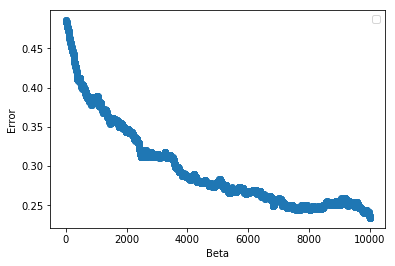

In [11]:
plot(all_errors)

In [33]:
progresses = []
range_size = 300

for (index, err) in enumerate(errors):
    if index > range_size:
        progress = errors[index-range_size][1] - err[1]
        progresses.append((index, progress))

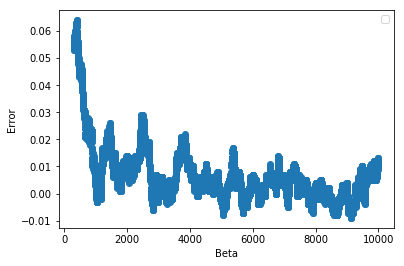

In [34]:
plot([progresses])

In [11]:
t_tresholds

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
errors = []
for i in range(N):
    error = #Glauber ou Metropolis_chain selon best_set_up
    errors.append(error)
mean = np.mean(errors)
variance = np.var(errors)
print('Mean error : ', mean)
print('Variance of error : ' variance)

In [86]:
best_set_up

('Metropolis', 'treshold :', 0.5, 'rate :', 5.0, 'error :', 0.015)

In [82]:
t_increasing = np.linspace(1.5, 5, num=8)
t_increasing

array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
BEST_SO_FAR = 0.01411756195508118 #Metropolis_chain(n_col, 100, B) 0.8